In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.xception import Xception

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.preprocessing import image

In [3]:
train = pd.read_csv('train.csv')
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [4]:
train_image = []
for i in tqdm(train.index):
    img = image.load_img('train/'+ train['image_names'][i], target_size=(350,350,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
tX = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████| 1646/1646 [00:11<00:00, 142.53it/s]


Emergency


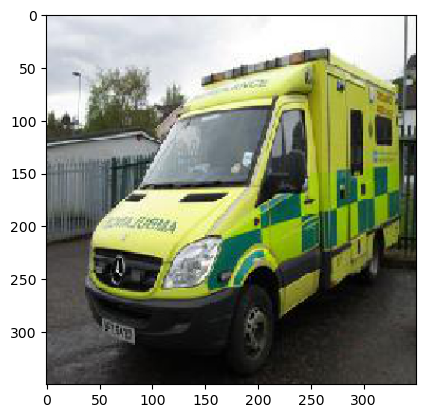

In [5]:
num = 17
plt.imshow(tX[num])
if (train['emergency_or_not'][num] == 1):
    print('Emergency')
else:
    print('No Emergency')

In [6]:
tY = train['emergency_or_not'].values

In [7]:
X_train, val_x, y_train, val_y = train_test_split(tX, tY, test_size = 0.2, random_state = 13, stratify=tY)

In [8]:
pre_trained_model = tf.keras.applications.Xception(input_shape = (350,350,3),
                               include_top = False,
                               weights = 'imagenet')

In [9]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [10]:
pre_trained_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 350, 350, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 174, 174, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 174, 174, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 174, 174, 32)         0         ['block1_conv1_bn[0][0]

                                                                                                  
 block4_sepconv2_act (Activ  (None, 43, 43, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 43, 43, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 43, 43, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv2d_2 

                                                                                                  
 block7_sepconv1 (Separable  (None, 22, 22, 728)          536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 22, 22, 728)          2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 22, 22, 728)          0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block7_se

 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 22, 22, 728)          0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 22, 22, 728)          0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 22, 22, 728)          536536    ['block10_sepconv1_act[0][0]']
 eConv2D)                                                                                         
          

 block12_sepconv3_act (Acti  (None, 22, 22, 728)          0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 22, 22, 728)          536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 22, 22, 728)          2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_10 (Add)                (None, 22, 22, 728)          0         ['block12_sepconv3_bn[0][0]', 
          

In [11]:
last_layer =  pre_trained_model.get_layer('add_11')
last_output = last_layer.output

In [12]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

In [13]:
model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [15]:
model.fit(X_train, y_train, epochs=20, validation_data=(val_x, val_y), batch_size=16)

Epoch 1/20
83/83 [==============================] - 227s 3s/step - loss: 6.3018 - acc: 0.8898 - val_loss: 2.1365 - val_acc: 0.9515
Epoch 2/20
83/83 [==============================] - 230s 3s/step - loss: 2.7430 - acc: 0.9263 - val_loss: 1.1338 - val_acc: 0.9485
Epoch 3/20
83/83 [==============================] - 222s 3s/step - loss: 0.8418 - acc: 0.9567 - val_loss: 4.5060 - val_acc: 0.8727
Epoch 4/20
83/83 [==============================] - 224s 3s/step - loss: 0.9042 - acc: 0.9666 - val_loss: 2.6086 - val_acc: 0.9333
Epoch 5/20
83/83 [==============================] - 222s 3s/step - loss: 0.6174 - acc: 0.9726 - val_loss: 1.2400 - val_acc: 0.9485
Epoch 6/20
83/83 [==============================] - 223s 3s/step - loss: 0.3431 - acc: 0.9848 - val_loss: 1.6203 - val_acc: 0.9576
Epoch 7/20
83/83 [==============================] - 224s 3s/step - loss: 0.3438 - acc: 0.9894 - val_loss: 1.9578 - val_acc: 0.9333
Epoch 8/20
83/83 [==============================] - 222s 3s/step - loss: 0.2860 - a

In [14]:
test = pd.read_csv('test.csv')
test.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [15]:
test.index

RangeIndex(start=0, stop=706, step=1)

In [16]:
test_image = []
for i in tqdm(test.index):
    img = image.load_img('test/'+ test['image_names'][i], target_size=(350,350,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|███████████████████████████████████████████████████████████████████████████████| 706/706 [00:05<00:00, 133.43it/s]


In [19]:
predictions = model.predict(test)

23/23 [==============================] - 60s 3s/step


In [21]:
a = np.floor(predictions)

In [23]:
submission = pd.read_csv('sample_submission.csv')
submission['emergency_or_not'] = a

In [24]:
submission.head()

,image_names,emergency_or_not
0,1960.jpg,0.0
1,668.jpg,1.0
2,2082.jpg,0.0
3,808.jpg,1.0
4,1907.jpg,0.0


In [25]:
submission.to_csv('submission29.csv', index = False)

In [26]:
model.save('emergency_identification.h5')

C:\Users\AJAY\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
